In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [2]:
denuncias_2017 = pd.read_csv('Denuncias_2017.csv')

denuncias_2018_01 = pd.read_csv('Denuncias_2018_01.csv')
denuncias_2018_02 = pd.read_csv('Denuncias_2018_02.csv')
denuncias_2018_03 = pd.read_csv('Denuncias_2018_03.csv')
denuncias_2018_04 = pd.read_csv('Denuncias_2018_04.csv')
denuncias_2018_05 = pd.read_csv('Denuncias_2018_05.csv')
denuncias_2018_06 = pd.read_csv('Denuncias_2018_06.csv')
denuncias_2018_07 = pd.read_csv('Denuncias_2018_07.csv')
denuncias_2018_08 = pd.read_csv('Denuncias_2018_08.csv')
denuncias_2018_09 = pd.read_csv('Denuncias_2018_09.csv')
denuncias_2018_10 = pd.read_csv('Denuncias_2018_10.csv')
denuncias_2018_11 = pd.read_csv('Denuncias_2018_11.csv')
denuncias_2018_12 = pd.read_csv('Denuncias_2018_12.csv')

denuncias_2019_01 = pd.read_csv('Denuncias_2019_01.csv')
denuncias_2019_02 = pd.read_csv('Denuncias_2019_02.csv')
denuncias_2019_03 = pd.read_csv('Denuncias_2019_03.csv')
denuncias_2019_04 = pd.read_csv('Denuncias_2019_04.csv')
denuncias_2019_05 = pd.read_csv('Denuncias_2019_05.csv')
denuncias_2019_06 = pd.read_csv('Denuncias_2019_06.csv')
denuncias_2019_07 = pd.read_csv('Denuncias_2019_07.csv')
denuncias_2019_08 = pd.read_csv('Denuncias_2019_08.csv')
denuncias_2019_09 = pd.read_csv('Denuncias_2019_09.csv')
denuncias_2019_10 = pd.read_csv('Denuncias_2019_10.csv')

denuncias = [denuncias_2017, denuncias_2018_01, denuncias_2018_02, denuncias_2018_03, 
             denuncias_2018_04, denuncias_2018_05, denuncias_2018_06, denuncias_2018_07,
             denuncias_2018_08, denuncias_2018_09, denuncias_2018_10, denuncias_2018_11,
             denuncias_2018_12, denuncias_2019_01, denuncias_2019_02, denuncias_2019_03,
             denuncias_2019_04, denuncias_2019_05, denuncias_2019_06, denuncias_2019_07,
             denuncias_2019_08, denuncias_2019_09, denuncias_2019_10]

# Limpieza
## Estandarizar columnas

In [3]:
# A lo largo del tiempo, van cambiando las columnas de las tablas. Sabemos las fechas en las que hay cambios en los nombres de las columnas

change_dates = [denuncias_2017, denuncias_2018_01, denuncias_2018_06, denuncias_2018_07, denuncias_2019_01, 
                denuncias_2019_05]

denuncias_2017.name = 'denuncias_2017'
denuncias_2018_01.name = 'denuncias_2018_01'
denuncias_2018_06.name = 'denuncias_2018_06'
denuncias_2018_07.name = 'denuncias_2018_07'
denuncias_2019_01.name = 'denuncias_2019_01'
denuncias_2019_05.name = 'denuncias_2019_05'

# cuales son todos los nombres de columnas de todos los dataframes?

column_names = []

for period in change_dates:
    for col in period.columns:
        if col not in column_names:
            column_names.append(col)
            
# ahora veo cuales dataframes tienen cada columna
col_changes = []

for col in column_names:
    l = []
    for period in change_dates:
        if col in period.columns:
            l.append(True)
        else:
            l.append(False)
    col_changes.append(l)       

col_changes_df = pd.DataFrame(col_changes, columns=['denuncias_2017', 'denuncias_2018_01', 'denuncias_2018_06', 'denuncias_2018_07', 'denuncias_2019_01', 
                'denuncias_2019_05'], index=column_names)

display(col_changes_df)

,denuncias_2017,denuncias_2018_01,denuncias_2018_06,denuncias_2018_07,denuncias_2019_01,denuncias_2019_05
denuncia_fecha,True,True,True,True,True,True
denuncia_tipo_explotacion,True,True,True,True,True,True
denuncia_via_ingreso,True,True,True,True,True,True
denunciante_tipo_acercamiento,True,False,False,False,False,False
hecho_localidad,True,False,False,False,False,False
hecho_provincia,True,True,True,False,False,False
hecho_pais,True,False,False,False,False,False
hecho_denuncia_previa,True,False,False,False,False,False
derivacion_judicializacion_organismo,True,False,False,False,False,False
derivacion_judicializacion_fecha,True,False,False,False,False,False


In [4]:
name_changes = {'denunciante_tipo_acercamiento':'acercamiento_tipo', 
                     'hecho_denuncia_previa':'denuncia_previa', 
                     'derivacion_judicializacion_organismo':'derivacion_organismo', 
                     'derivacion_judicializacion_fecha':'derivacion_fecha', 
                     'victima_genero': 'victima_identificada_genero', 
                     'victima_rango_etario':'victima_identificada_rango_etario', 
                     'victima_discapacidad':'victima_identificada_discapacidad', 
                     'victima_embarazada':'victima_identificada_embarazada', 
                     'victima_provincia_origen':'victima_identificada_provincia_origen', 
                     'victima_provincia_origen_indec_id':'victima_identificada_provincia_origen_id', 
                     'victima_nacionalidad':'victima_identificada_nacionalidad',
                     'llamante_provincia_indec_id':'llamante_provincia_id',
                     'victimas_estimadas_provincia_hecho_indec_id':'victimas_estimadas_provincia_hecho_id', 
                     'denunciado_provincia_indec_id':'denunciado_provincia_id'}

"""A partir de 2018_07 empiezan a diferenciar entre victimas identificadas y estimadas
Mejor hacer una columna identificada: True/False y que las variables embarazada/genero/etc apliquen 
a ambos casos, a menos que me esté perdiendo algo? Puede haber victimas identificadas y estimadas en un mismo caso?
Sera que en la planilla original tenian los nombres de algunas, luego cuando publican los datos los anonimizan y separan 
las columnas oentre identificadas y no? O los registraban asi de una?

# Iteramos sobre los dfs y estandarizamos los nombres de las columnas, agregando NaN para las rows que no tienen valores
 podría meter todo lo de abajo en un for que itera sobre los dfs"""

final_cols = ['denuncia_fecha', 'denuncia_previa', 'derivacion_seguimiento', 'llamante_anonimo', 
                    'llamante_genero', 'llamante_rango_etario', 'llamante_provincia', 'llamante_provincia_indec_id', 
                    'llamante_es_victima', 'denuncia_tipo_explotacion', 'denuncia_via_ingreso', 
                    'denunciante_tipo_acercamiento', 'hecho_localidad', 'hecho_provincia', 'hecho_provincia_indec_id', 
                    'hecho_pais', 'hecho_denuncia_previa', 'derivacion_judicializacion_organismo', 
                    'derivacion_judicializacion_fecha', 'victima_genero', 'victima_rango_etario', 'victima_discapacidad', 
                    'victima_embarazada', 'victima_provincia_origen','victima_provincia_origen_indec_id', 
                    'victima_cantidad', 'victima_nacionalidad', 'victimas_estimadas_cantidad','victimas_estimadas_genero', 
                    'victimas_estimadas_rango_etario', 'victimas_estimadas_provincia_hecho', 
                    'victimas_estimadas_provincia_hecho_indec_id', 'denunciado_genero', 'denunciado_rango_etario', 
                    'denunciado_provincia', 'denunciado_provincia_indec_id', 'connivencia_fuerzas_seguridad', 
                    'connivencia_poder_politico']


# estandarizamos los nombres

for df in denuncias:
    old_cols = df.columns.tolist()
    for col in old_cols:
        if col in name_changes:
            new_name = name_changes[col]
            df.rename(columns = {col: new_name}, inplace = True)
        
# chequear si esta bien transformar victima_genero en victima_identificada_genero etc a partir de 2017

denuncias = pd.concat([denuncias_2017, denuncias_2018_01, denuncias_2018_02, denuncias_2018_03, 
             denuncias_2018_04, denuncias_2018_05, denuncias_2018_06, denuncias_2018_07,
             denuncias_2018_08, denuncias_2018_09, denuncias_2018_10, denuncias_2018_11,
             denuncias_2018_12, denuncias_2019_01, denuncias_2019_02, denuncias_2019_03,
             denuncias_2019_04, denuncias_2019_05, denuncias_2019_06, denuncias_2019_07,
             denuncias_2019_08, denuncias_2019_09, denuncias_2019_10], sort=False, ignore_index=True)

denuncias = denuncias.drop(columns=['victimas_estimadas_provincia_hecho_id', 'victima_identificada_provincia_origen_id', 'denunciado_provincia_id', 'llamante_provincia_id'])

display(denuncias)

,denuncia_fecha,denuncia_tipo_explotacion,denuncia_via_ingreso,acercamiento_tipo,hecho_localidad,hecho_provincia,hecho_pais,denuncia_previa,derivacion_organismo,derivacion_fecha,...,denunciado_provincia,connivencia_fuerzas_seguridad,connivencia_poder_politico,hecho_provincia_indec_id,denunciado_rango_etario,victimas_estimadas_cantidad,victimas_estimadas_genero,victimas_estimadas_rango_etario,victimas_estimadas_provincia_hecho,victima_identificada_provincia_origen_indec_id
0,2017-01-01,Explotación sexual,Línea 145,Otros,BARRIO SAENZ PEÑA,Santa Fe,Argentina,NaN,Protex,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,Explotación sexual,Línea 145,Otros,CORDOBA,Córdoba,Argentina,NaN,Protex,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,Explotación sexual,Línea 145,Otros,TUCUMAN,Tucumán,Argentina,NaN,Protex,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,Desaparición,Línea 145,Televisión,MORENO,Buenos Aires,Argentina,NaN,Protex - Fuerzas de seguridad federales,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,Explotación sexual,Línea 145,Otros,CONCEPCION,Tucumán,Argentina,NaN,Protex - Fuerzas de seguridad federales,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,2019-10-31,"Explotación Laboral de N, N y A",Línea 145,NS/NC,NaN,NaN,NaN,Nueva,Gendarmería y Protex,2019-10-31,...,Salta,No,No,NaN,NS/NC,1,Masculino,10,Salta,NaN
6518,2019-10-31,Oferta Laboral Engañosa,Línea 145,Boca en Boca,NaN,NaN,NaN,Nueva,Area Legal para judicializar,2019-10-31,...,NS/NC,No,No,NaN,NS/NC,1,Femenino,20,CABA,NaN
6519,2019-10-31,Desaparición de personas,Línea 145,NS/NC,NaN,NaN,NaN,Nueva,Protex y Personas Extraviadas,2019-10-31,...,NS/NC,No,No,NaN,NS/NC,1,Masculino,20,Buenos Aires,NaN
6520,2019-10-31,Explotación Laboral,Línea 145,NS/NC,NaN,NaN,NaN,Nueva,Gendarmería y Protex,2019-10-31,...,NS/NC,No,No,NaN,NS/NC,9,Presencia de M y H,NS/NC,Buenos Aires,NaN


## Limpieza columna por columna

### Missing Values

In [5]:
print(denuncias.shape)
print(denuncias.isnull().sum())

(6522, 34)
denuncia_fecha                                       2
denuncia_tipo_explotacion                           43
denuncia_via_ingreso                                19
acercamiento_tipo                                    0
hecho_localidad                                   3845
hecho_provincia                                   2723
hecho_pais                                        3786
denuncia_previa                                   2449
derivacion_organismo                                69
derivacion_fecha                                   112
derivacion_seguimiento                            2836
llamante_anonimo                                  2835
llamante_genero                                   2835
llamante_rango_etario                             2835
llamante_provincia                                2835
llamante_es_victima                               2835
victima_identificada_genero                       2835
victima_identificada_rango_etario                 2835

In [6]:
# Cuántos NaNs tienen las rows con NaNs 
denuncias.isnull().sum(axis=1).value_counts()

25    2217
6     1485
5     1137
8      716
24     347
9      345
26     140
28      55
27      43
29      12
31      11
30      10
7        2
12       2
dtype: int64

### denunciado_rango_etario

In [7]:
'''estos son strings. con regex elegir las rows q no tengan ninguna letra, convertirlas a int, calcular rango y pasarlo a la strig correspondiente.'''

# no hay 16 a 18??
        
# Despues de haber pasado todo a strings, pasar el tipo de columna a "categorial"

for index, row in denuncias['denunciado_rango_etario'].iteritems():
    # ignore NaNs:
    if row != row:
        pass
    elif len(row) == 2:
        if int(row) <= 14:
            denuncias.replace(row, '0 a 13', inplace=True)
        elif 14 < int(row) <= 18:
            denuncias.replace(row, '14 a 16', inplace=True)
        elif 16 < int(row) <= 18:
            denuncias.replace(row, '16 a 17 (específico para trabajo adolescente)', inplace=True)
        elif 18 < int(row) <= 25:
            denuncias.replace(row, '18 a 25', inplace=True)
        elif 25 < int(row) <= 40:
            denuncias.replace(row, '26 a 40', inplace=True)
        elif 40 < int(row) <= 60:
            denuncias.replace(row, '41 a 60', inplace=True)
        elif int(row) >= 61:
            denuncias.replace(row, '61 en adelante', inplace=True)
        else:
            print(row)

print(denuncias['denunciado_rango_etario'].value_counts())


NS/NC                                            1200
No sabe/no contesta                               721
26 a 40                                           299
41 a 60                                           267
18 a 25                                            66
61 en adelante                                     60
14 a 16                                            56
No refiere                                         39
0 a 13                                             28
ns/nc                                               6
16 a 17 (específico para trabajo adolescente)       5
Ns/Nc                                               2
nS/NC                                               2
1                                                   1
Sin datos                                           1
Ns/NC                                               1
14 a 15                                             1
NS/NC                                               1
Name: denunciado_rango_etari

In [8]:
# Quedan algunos cabos sueltos, que manejamos individualmente
denuncias['denunciado_rango_etario'] = denuncias['denunciado_rango_etario'].str.strip()
denuncias['denunciado_rango_etario'] = denuncias['denunciado_rango_etario'].str.title()
denuncias['denunciado_rango_etario'].replace('1', np.nan, inplace=True)
denuncias['denunciado_rango_etario'].replace('Sin datos', np.nan, inplace=True)
denuncias['denunciado_rango_etario'].replace('14 A 15', '14 A 16', inplace=True)
denuncias['denunciado_rango_etario'].replace('Ns/Nc', np.nan, inplace=True)
denuncias['denunciado_rango_etario'].replace('No Sabe/No Contesta', np.nan, inplace=True)
denuncias['denunciado_rango_etario'].replace('No Refiere', np.nan, inplace=True)
denuncias['denunciado_rango_etario'].replace('Sin Datos', np.nan, inplace=True)

print(denuncias['denunciado_rango_etario'].value_counts())

26 A 40                                          299
41 A 60                                          267
18 A 25                                           66
61 En Adelante                                    60
14 A 16                                           57
0 A 13                                            28
16 A 17 (Específico Para Trabajo Adolescente)      5
Name: denunciado_rango_etario, dtype: int64


### denuncia_previa

In [9]:
denuncias['denuncia_previa'] = denuncias['denuncia_previa'].str.strip()
denuncias['denuncia_previa'] = denuncias['denuncia_previa'].str.title()
denuncias['denuncia_previa'].replace('Sin Datos', np.nan, inplace=True)
denuncias['denuncia_previa'].replace('', np.nan, inplace=True)


# Qué significa el valor "sí"?? No indica si es nueva, relacionada, ampliatoria, etc
denuncias['denuncia_previa'].value_counts()

No                                               1403
Nueva                                            1044
Sí                                                889
Ampliatoria                                       359
Relacionada                                       182
Amplía Y Está Relacionada Con Otras Denuncias      28
Name: denuncia_previa, dtype: int64

In [10]:
denuncias['derivacion_seguimiento'] = denuncias['derivacion_seguimiento'].str.title()
denuncias['derivacion_seguimiento'].replace('Sin Datos', np.nan, inplace=True)

denuncias['derivacion_seguimiento'].value_counts()

No    3578
Sí     106
Name: derivacion_seguimiento, dtype: int64

In [11]:
denuncias['llamante_anonimo'] = denuncias['llamante_anonimo'].str.strip()
denuncias['llamante_anonimo'] = denuncias['llamante_anonimo'].str.title()

denuncias['llamante_anonimo'].replace('Sin Datos', np.nan, inplace=True)
denuncias['llamante_anonimo'].replace(to_replace='Anónima', value='Sí', regex=True, inplace=True)

denuncias['llamante_anonimo'].value_counts()

#Explorar Sin Datos para ver si las columnas de datos del llamante están vacías. En ese caso, transformar a 'Sí'

No    1977
Sí    1708
Name: llamante_anonimo, dtype: int64

In [12]:
denuncias['llamante_genero'] = denuncias['llamante_genero'].str.title()

denuncias['llamante_genero'].replace(to_replace=['No Sabe/No Contesta', 'Ns/Nc', 'Sin Datos'], value=np.nan, inplace=True)

denuncias['llamante_genero'].replace(to_replace='Situaciones con hombres y mujeres o trans (varios)', value='Varios', inplace=True)

denuncias['llamante_genero'].value_counts()
# Que serían 'Situaciones'???? Supongo que hay varias personas llamando para denunciar, de distintos generos.. Sería Otros

Femenino                                              1818
Masculino                                              903
Trans                                                    4
Situaciones Con Hombres Y Mujeres O Trans (Varios)       3
Otros                                                    1
Name: llamante_genero, dtype: int64

In [13]:


for index, row in denuncias['llamante_rango_etario'].iteritems():
    # ignore NaNs:
    if row != row:
        pass
    elif len(row) == 2:
        if int(row) <= 14:
            denuncias.replace(row, '0 a 13', inplace=True)
        elif 14 < int(row) <= 18:
            denuncias.replace(row, '14 a 16', inplace=True)
        elif 16 < int(row) <= 18:
            denuncias.replace(row, '16 a 17 (específico para trabajo adolescente)', inplace=True)
        elif 18 < int(row) <= 25:
            denuncias.replace(row, '18 a 25', inplace=True)
        elif 25 < int(row) <= 40:
            denuncias.replace(row, '26 a 40', inplace=True)
        elif 40 < int(row) <= 60:
            denuncias.replace(row, '41 a 60', inplace=True)
        elif int(row) >= 61:
            denuncias.replace(row, '61 en adelante', inplace=True)
        else:
            print(row)
            
denuncias['llamante_provincia'] = denuncias['llamante_provincia'].str.strip()
denuncias['llamante_provincia'] = denuncias['llamante_provincia'].str.title()            
# denuncias['llamante_rango_etario'].replace(to_replace='[Nn][Ss]/[Nn][Cc]', value='No sabe/no contesta', regex=True, inplace=True)

print(denuncias['llamante_rango_etario'].value_counts())

# Tiene sentido tener "No refiere" y "Sin datos"?



NS/NC                                            1253
0 a 13                                            630
No sabe/no contesta                               611
14 a 16                                           406
26 a 40                                           295
41 a 60                                           223
18 a 25                                           170
61 en adelante                                     44
No refiere                                         27
16 a 17 (específico para trabajo adolescente)       8
NS/nc                                               7
ns/nc                                               6
Ns/nc                                               3
Sin datos                                           2
ns/NC                                               1
Ns/NC                                               1
Name: llamante_rango_etario, dtype: int64


In [41]:
denuncias['llamante_provincia'] = denuncias['llamante_provincia'].str.strip()
denuncias['llamante_provincia'] = denuncias['llamante_provincia'].str.title()

denuncias['llamante_provincia'].replace('Ns/Nc', np.nan, inplace=True)
denuncias['llamante_provincia'].replace('Sin Datos', np.nan, inplace=True)
denuncias['llamante_provincia'].replace('Sin Dato/No Contesta', np.nan, inplace=True)
denuncias['llamante_provincia'].replace('No Sabe/No Contesta', np.nan, inplace=True)
denuncias['llamante_provincia'].replace('Internet', np.nan, inplace=True)
denuncias['llamante_provincia'].replace('Otro País Donde Ocurre El Hecho', 'País Extranjero', inplace=True)
denuncias['llamante_provincia'].replace('Santiado Del Estero', 'Santiago del Estero', inplace=True)


print(denuncias['llamante_provincia'].value_counts()) 
print(denuncias['llamante_provincia'].isnull().sum())

Buenos Aires                       775
Ciudad Autónoma De Buenos Aires    568
Córdoba                            238
Chubut                             206
Santa Fe                           143
Mendoza                            141
Chaco                              117
Salta                               78
Corrientes                          67
Tucumán                             66
Neuquén                             56
Misiones                            54
Entre Ríos                          51
Río Negro                           36
Jujuy                               35
Santiago Del Estero                 27
Catamarca                           18
Tierra Del Fuego                    17
Formosa                             14
San Juan                            11
Santa Cruz                           8
San Luis                             8
La Rioja                             6
La Pampa                             5
País Extranjero                      2
Name: llamante_provincia,

In [15]:
denuncias['llamante_provincia'].replace('Santiado del Estero', 'Santiago del Estero', inplace=True)
denuncias['llamante_provincia'].replace(to_replace=['NS/NC', 'Sin datos', 'Sin dato/no contesta', 'Internet'], value=np.nan, inplace=True)

denuncias['llamante_provincia'].replace('Otro país donde ocurre el hecho', 'País extranjero', inplace=True)


denuncias['llamante_provincia'].value_counts()



Buenos Aires                       775
Ciudad Autónoma de Buenos Aires    343
Córdoba                            238
Ciudad Autónoma De Buenos Aires    225
Chubut                             206
Santa Fe                           143
Mendoza                            141
Chaco                              117
Salta                               78
Corrientes                          67
Tucumán                             66
Neuquén                             56
Misiones                            54
Entre Ríos                          51
Río Negro                           36
Jujuy                               35
Catamarca                           18
Tierra Del Fuego                    17
Santiago Del Estero                 15
Formosa                             14
Santiago del Estero                 12
San Juan                            11
Santa Cruz                           8
San Luis                             8
La Rioja                             6
La Pampa                 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

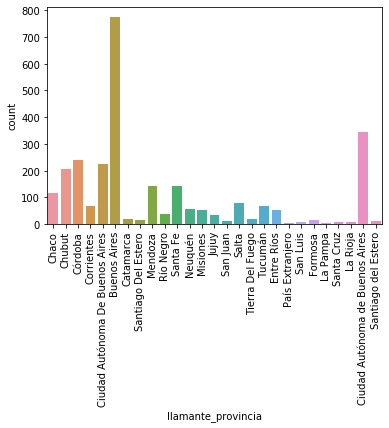

In [16]:
sns.countplot(x='llamante_provincia', data=denuncias)
plt.xticks(rotation=90)

In [17]:
denuncias['llamante_es_victima'] = denuncias['llamante_es_victima'].str.title()
denuncias['llamante_es_victima'].replace('Víctima Directa', 'Sí - Víctima directa', inplace=True)
denuncias['llamante_es_victima'].replace('Víctima Indirecta', 'Sí - Víctima indirecta', inplace=True)
denuncias['llamante_es_victima'].replace('No es víctima', 'No', inplace=True)
denuncias['llamante_es_victima'].replace(to_replace=['Sin Datos', 'Ns/Nc'], value='No', inplace=True)


denuncias['llamante_es_victima'].value_counts()

No                        1644
No Es Víctima             1275
Sí                         431
Sí - Víctima directa       262
Sí - Víctima indirecta      75
Name: llamante_es_victima, dtype: int64

In [18]:
denuncias['denuncia_tipo_explotacion'] = denuncias['denuncia_tipo_explotacion'].str.strip()
denuncias['denuncia_tipo_explotacion'] = denuncias['denuncia_tipo_explotacion'].str.title()

denuncias['denuncia_tipo_explotacion'].replace(to_replace=['Eplotacion  Sexual', 'Exploacion Sexual'], value='Explotación sexual', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Explotación Laboral de N, N y A', 'Explotación laboral de niñas, niños y adolescentes', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Explotación Sexual de N, N y A', 'Explotación sexual de niñas, niños y adolescentes', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace(to_replace=['NS/NC', 'Sin Datos'], value=np.nan, inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Indicadores de Posible Trata de Personas', 'Posible trata de personas (hecho indefinido) ', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Publicidad de Oferta Sexual', 'Publicidad de oferta sexual', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Venta de Niñxs y otros delitos', 'Venta de niños y otros delitos', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Indicadores de Posible Trata de Personas', 'Posible trata de personas (hecho indefinido)', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Indicadores de posible trata de personas', 'Posible trata de personas (hecho indefinido)', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Desaparición', 'Desaparición de personas', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Matrimonio forzado', 'Matrimonio Forzoso', inplace=True)
denuncias['denuncia_tipo_explotacion'].replace('Servidumbre doméstica', 'Reducción a la servidumbre o situaciones análogas', inplace=True)

denuncias['denuncia_tipo_explotacion'].value_counts()

# Algunas de las categorías son combinaciones de otras categorías. Separar en distintas columnas?

Explotación Sexual                                                                2884
Desaparición de personas                                                           832
Explotación Laboral                                                                738
Posible Captación                                                                  597
Oferta Laboral Engañosa                                                            246
Secuestro/Venta De Niños/Pornografía Infantil                                      240
Posible Trata De Personas (Hecho Indefinido)                                       190
Desaparición De Personas                                                           153
Publicidad De Oferta Sexual                                                        123
Traslado De Personas                                                                71
Venta De Niños Y Otros Delitos                                                      67
Grooming                                   

In [19]:
denuncias['denuncia_via_ingreso'] = denuncias['denuncia_via_ingreso'].str.title()
denuncias['denuncia_via_ingreso'].replace('Sin Datos', np.nan, inplace=True)
denuncias['denuncia_via_ingreso'].value_counts()

# Llamadas realizadas por seguimiento == Seguimiento?
# Línea telefónica institucional == Teléfono institucional (no salientes)??


Línea 145                                5920
Correo Institucional                      330
Correo Electrónico                        124
Línea Telefónica Institucional             35
Teléfono Institucional (No Salientes)      20
Llamadas Salientes                         10
Llamadas Realizadas Por Seguimiento         9
Línea 149                                   7
Solicitud Institucional- Saliente           6
Presencial                                  5
Línea 145 Y Correo Institucional            4
Línea 149 - Cenavid                         3
No Aplica                                   1
Seguimiento                                 1
Radio                                       1
Name: denuncia_via_ingreso, dtype: int64

In [32]:
denuncias['acercamiento_tipo'] = denuncias['acercamiento_tipo'].str.strip()
denuncias['acercamiento_tipo'] = denuncias['acercamiento_tipo'].str.title()

denuncias['acercamiento_tipo'].replace(to_replace=['Ong - Organismos Nacionales', 'Ong-Organismos Nacionales', 'Ong – Org Nacionales'], value='ONG - Organismos Nacionales', inplace=True)
denuncias['acercamiento_tipo'].replace('Por Contacto (Boca En Boca)', 'Boca En Boca', inplace=True)
denuncias['acercamiento_tipo'].replace(to_replace = ['No Contesta / No Se Consultó', 'Ns/Nc', 'No Sabe/No Contesta', 'Sin Datos', 'No Se Consultó', '´No Se Consultó'], value=np.nan, inplace=True)
denuncias['acercamiento_tipo'].replace('Tv', 'Televisión', inplace=True)
denuncias['acercamiento_tipo'].replace('Otros Modos De Acercamiento A La Línea', 'Otros', inplace=True)

denuncias['acercamiento_tipo'].value_counts()

#Creo que muchas veces, los que cargan estas planillas usan "Otros", "No sabe/no contesta" y "Sin datos" como sinónimos.


Otros                          2373
ONG - Organismos Nacionales     839
Internet                        441
Boca En Boca                    429
Televisión                      356
Campañas Del Programa            85
Radio                            44
Capacitación                     20
Name: acercamiento_tipo, dtype: int64

In [39]:
denuncias['hecho_localidad'] = denuncias['hecho_localidad'].str.title()
denuncias['hecho_localidad'] = denuncias['hecho_localidad'].str.strip()

denuncias['hecho_localidad'].replace('Bs As', 'Buenos Aires', inplace=True)
denuncias['hecho_localidad'].replace('Provincia De Buenos Aires', 'Buenos Aires', inplace=True)

denuncias['hecho_localidad'].replace(to_replace=['Caba', 'Capital Federal', 'Ciuudad Autonoma De Buenos Aires', 'Ciudad Autonoma De Buenos Aires', 'Capital Federal'], value='CABA', inplace=True)


# Barrios de CABA

denuncias['hecho_localidad'].replace('Microcentro', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Villa Cresco', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Recoleta ', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('San Telmo', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Barrio San Telmo', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Villa Lugano - Caba', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace(' Barrio Flores', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Villa Crespo/Chacarita', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Barrio De Palermo', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Retiro', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Constitucion', 'CABA', inplace=True)
denuncias['hecho_localidad'].replace('Belgrano', 'CABA', inplace=True)



denuncias['hecho_localidad'].replace('Mdq', 'Mar Del Plata', inplace=True)
denuncias['hecho_localidad'].replace('Ciudad Mar Del Plata', 'Mar Del Plata', inplace=True)

denuncias['hecho_localidad'].replace('Hurlingan', 'Hurlingham', inplace=True)
denuncias['hecho_localidad'].replace('Partido De Hurlingham ', 'Hurlingham', inplace=True)

denuncias['hecho_localidad'].replace('Misíones', 'Misiones', inplace=True)

denuncias['hecho_localidad'].replace('Córdoba Capital', 'Ciudad de Córdoba', inplace=True)
denuncias['hecho_localidad'].replace('Ciudad Córdoba', 'Ciudad de Córdoba', inplace=True)
denuncias['hecho_localidad'].replace('Corboda', 'Ciudad de Córdoba', inplace=True)
denuncias['hecho_localidad'].replace('Corodba', 'Ciudad de Córdoba', inplace=True)
denuncias['hecho_localidad'].replace('Córdoba', 'Ciudad de Córdoba', inplace=True)

pd.options.display.max_rows = 700


#Monte Castro. Caba
#Monte Castro
#Villa Soldati
#Barrio Cumelen. Neuquén                                               1
#Plottier (Neuquén)   
# Microcentro no es localidad
# Puerto Libertad\r\nIguazu
# Villa Crespo no es localidad
display(denuncias['hecho_localidad'].value_counts())

CABA                                                                483
Rosario                                                             105
Ciudad De Córdoba                                                    60
La Plata                                                             59
Mar Del Plata                                                        58
Mendoza                                                              53
Salta                                                                50
Buenos Aires                                                         46
Santa Fe                                                             39
Flores                                                               38
Moreno                                                               32
La Matanza                                                           30
Neuquén                                                              29
Lomas De Zamora                                                 

### Columnas limpias:
- 'denunciado_rango_etario'
- 'denuncia_previa'
- 'derivacion_seguimiento'
- 'llamante_anonimo'
- 'llamante_genero'
- 'llamante_rango_etario'
- 'llamante_provincia'
- 'llamante_es_victima'
- 'denuncia_tipo_explotacion' - Revisar
- 'denuncia_via_ingreso'
- 'acercamiento_tipo'
- 'hecho_localidad'


### Por limpiar:
'llamante_provincia_indec_id', 'hecho_provincia', 'hecho_provincia_indec_id', 'hecho_pais', 'hecho_denuncia_previa', 'derivacion_judicializacion_organismo', 'derivacion_judicializacion_fecha', 'victima_genero', 'victima_rango_etario', 'victima_discapacidad',  'victima_embarazada', 'victima_provincia_origen','victima_provincia_origen_indec_id', 
'victima_cantidad', 'victima_nacionalidad', 'victimas_estimadas_cantidad','victimas_estimadas_genero', 
'victimas_estimadas_rango_etario', 'victimas_estimadas_provincia_hecho', 'victimas_estimadas_provincia_hecho_indec_id', 'denunciado_genero', 'denunciado_rango_etario', 'denunciado_provincia', 'denunciado_provincia_indec_id', 'connivencia_fuerzas_seguridad', 'connivencia_poder_politico']

Hay dos tipos de datasets:

- Denuncias
- Orientaciones (para casos que no son trata)

Nos interesan solamente las denuncias.

## Denuncias

Los datasets están divididos por año y/o mes

2017 - Dataset anual
2018 - Datasets mensuales, 2018-01 a 2018-12
2019 - Datasets mensuales, 2019-01 a 2019-10 (no está completo todavía el año)

Las columnas se fueron modificando a lo largo del tiempo, en general fue aumentando el número de columnas para sumar más información, algunas desaparecieron y otras cambiaron de nombre.

### 2017

- 10 columnas
 'denuncia_fecha',
 'denuncia_tipo_explotacion',
 'denuncia_via_ingreso',
 'denunciante_tipo_acercamiento',
 'hecho_localidad',
 'hecho_provincia',
 'hecho_pais',
 'hecho_denuncia_previa',
 'derivacion_judicializacion_organismo',
 'derivacion_judicializacion_fecha'

### 2018-01

'denuncia_fecha' - Se mantiene
'denuncia_tipo_explotacion' - Se mantiene
'denuncia_via_ingreso' - Se mantiene
'denunciante_tipo_acercamiento' - Se transforma en 'acercamiento_tipo'
'hecho_localidad' - Desaparece
'hecho_provincia' - Se mantiene
'hecho_pais' - Desaparece
'hecho_denuncia_previa' se transforma en 'denuncia_previa'
'derivacion_judicializacion_organismo' se transforma en 'derivacion_organismo'
'derivacion_judicializacion_fecha' se transforma en 'derivacion_fecha'

Aparecen columnas nuevas:
'connivencia_fuerzas_seguridad'
'connivencia_poder_politico'
'denunciado_genero'
'denunciado_provincia'
'denunciado_provincia_indec_id'
'derivacion_seguimiento'
'hecho_provincia_indec_id'
'llamante_anonimo'
'llamante_es_victima'
'llamante_genero'
'llamante_provincia'
'llamante_provincia_indec_id'
'llamante_rango_etario'
'victima_cantidad'
'victima_discapacidad'
'victima_embarazada'
'victima_genero'
'victima_nacionalidad'
'victima_provincia_origen'
'victima_provincia_origen_indec_id'
'victima_rango_etario'

localizacion: se empieza a considerar no solamente en que provincia sucedio el hecho, sino de que provincia son los actores involucrados (victima y denunciado)
se recaban mas datos del denunciado y de la victima
se taguea la localizacion con una id del indec
se empieza a registrar la connivencia con el poder politico y las fuerzas de seguridad\
se registra como se acerco el denunciado a la victima

### 2018-06

se suma 'denunciado_rango_etario'


### 2018-07

Se diferencia a las víctimas entre 'identificadas' y 'estimadas'.
Se suman:

'victima_identificada_discapacidad',
'victima_identificada_embarazada',
'victima_identificada_genero',
'victima_identificada_nacionalidad',
'victima_identificada_provincia_origen',
'victima_identificada_provincia_origen_indec_id',
'victima_identificada_rango_etario',
'victimas_estimadas_cantidad',
'victimas_estimadas_genero',
'victimas_estimadas_provincia_hecho',
'victimas_estimadas_provincia_hecho_indec_id',
'victimas_estimadas_rango_etario'

### 2019

Se mantiene igual con respecto a 2018 los primeros meses. En 201905 cambian los nombres de las columnas para sacarles la palabra 'indec'. El contenido presumiblemente es el mismo (chequear).
'denunciado_provincia_id'y eliminan 'denunciado_provincia_indec_id'
(probablemente sea un cambio de nombre)
lo mismo con 'llamante_provincia_indec_id' y 'llamante_provincia_indec_id' 

- Chequear si los datos son iguales en las columnas que cambiaron de nombre antes de mergear

In [22]:
# Tener en cuenta que esta es la connivencia que el denunciante conoce, puede haber muchos mas casos con connivencia donde la persona denunciante no esta al tanto
denuncias['connivencia_fuerzas_seguridad'].value_counts() 

No             2893
Sí              481
No Refiere      140
NO              102
no               63
sí                4
Sin datos         2
SÍ                2
Name: connivencia_fuerzas_seguridad, dtype: int64

In [23]:
denuncias['connivencia_poder_politico'].value_counts()

No            3227
Sí             155
No Refiere     133
NO             113
no              53
sí               2
Sin datos        2
nO               2
Name: connivencia_poder_politico, dtype: int64